In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

import mglearn

## DecisionTree (p.229)

- 설명하기 좋은 알고리즘
- 과적합 문제 
- 전처리가 거의 필요없다.(표준화, scaling, 정규화)
- 균일도 측정방식
    + 엔트로피를 이용한 Information Gain 지수(ID3 알고리즘)
    + 지니 계수 : 0(평등, 균일하지 않고 한쪽으로 쏠려있지 않음) -> 1(불평등, 같은 애들끼리 몰려있음)
        즉, 1로 갈수록 좋은 것!

#### 시각화 도구 설치

- http://www.graphviz.org / Index of /Packages/stable/windows/10/cmake/Release/x64
    + 프로그램 다운도르 두 설치(path 설정까지)
    
    
- pip install graphviz

In [2]:
#!pip install graphviz

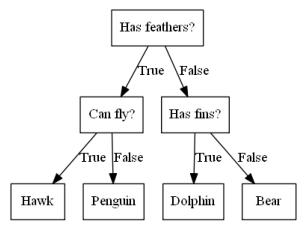

In [6]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
mglearn.plots.plot_animal_tree()

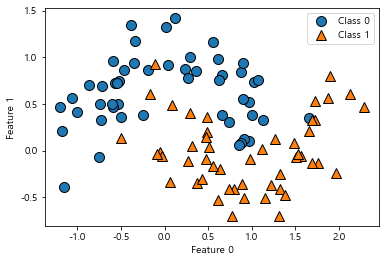

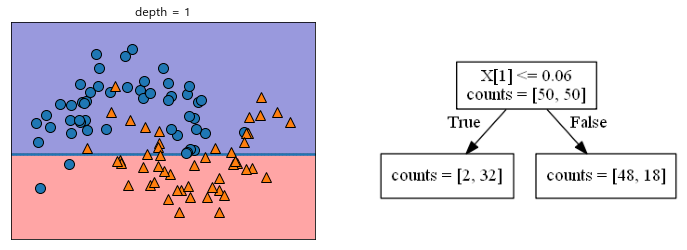

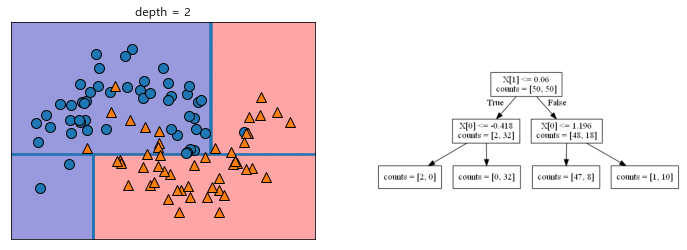

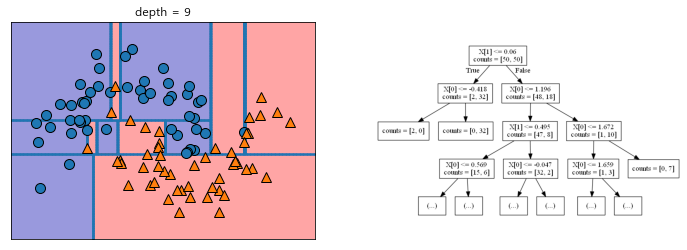

In [3]:
mglearn.plots.plot_tree_progressive()

---
### 복잡도 제어 : Prunning(가지치기)

- 종류
    + 사전 가지치기
    + 사후 가지치기
    + sklearn에서는 사후 가지치기만 지원
    
    
- 파라미터
    + min_samples_split
    + min_samples_leaf
    + max_features
    + max_depth
    + max_leaf_nodes

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [5]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [6]:
# 훈련
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_train, y_train)

In [25]:
# 시각화
from sklearn.tree import export_graphviz

In [8]:
# 외부파일로 저장
# impurity=True : 혼잡도 나타내겠다.
export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

In [26]:
import os
import graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

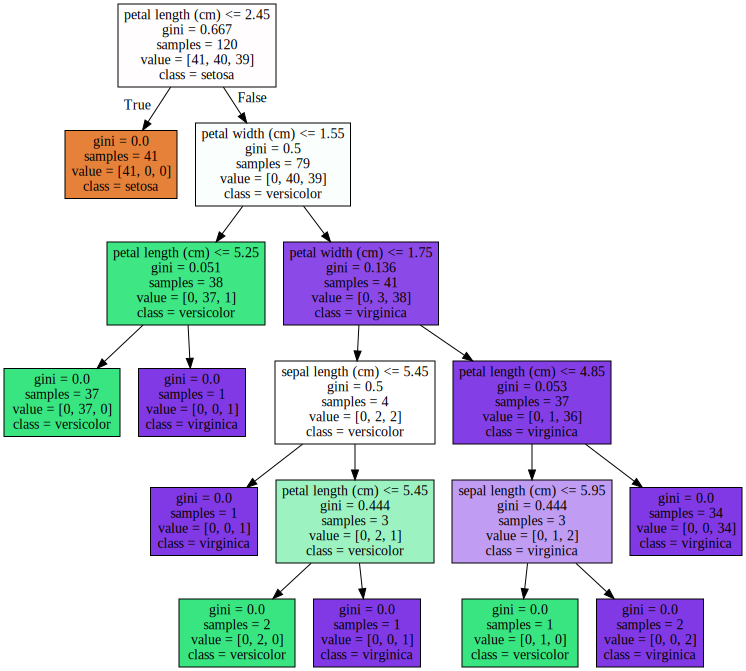

In [11]:
with open("data/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

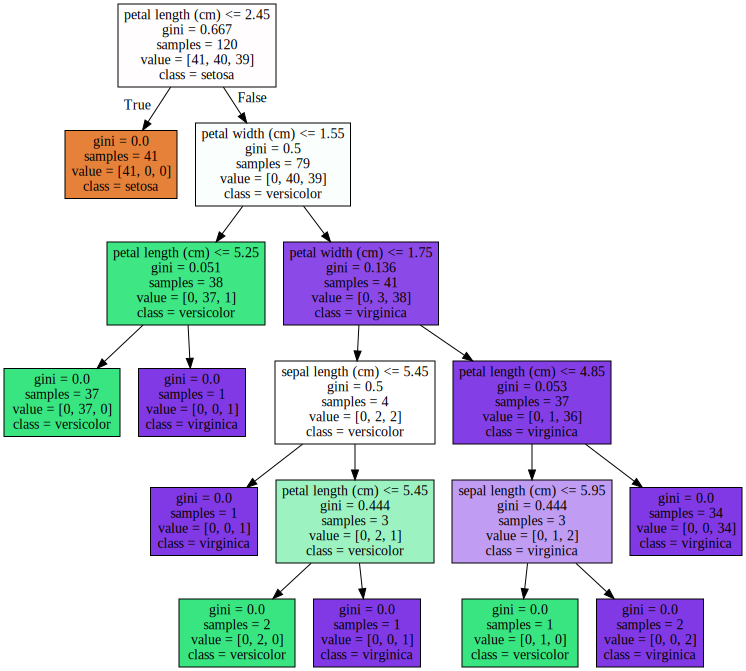

In [15]:
# max_depth
df_clf = DecisionTreeClassifier(random_state=156, max_depth=3).fit(X_train, y_train)

# 그래프
export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

#
with open("data/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

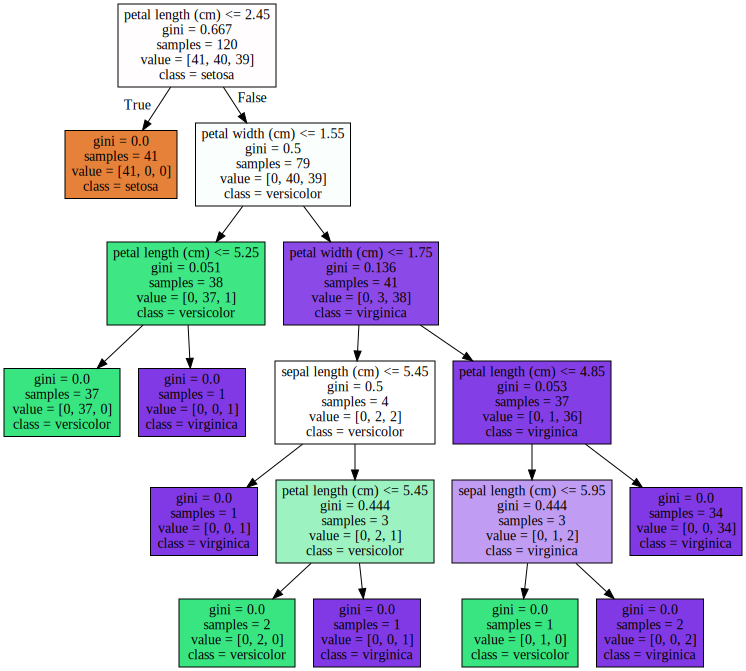

In [17]:
# min_samples_split : 분할하기 위한 최소한의 샘플 수
df_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

with open("data/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

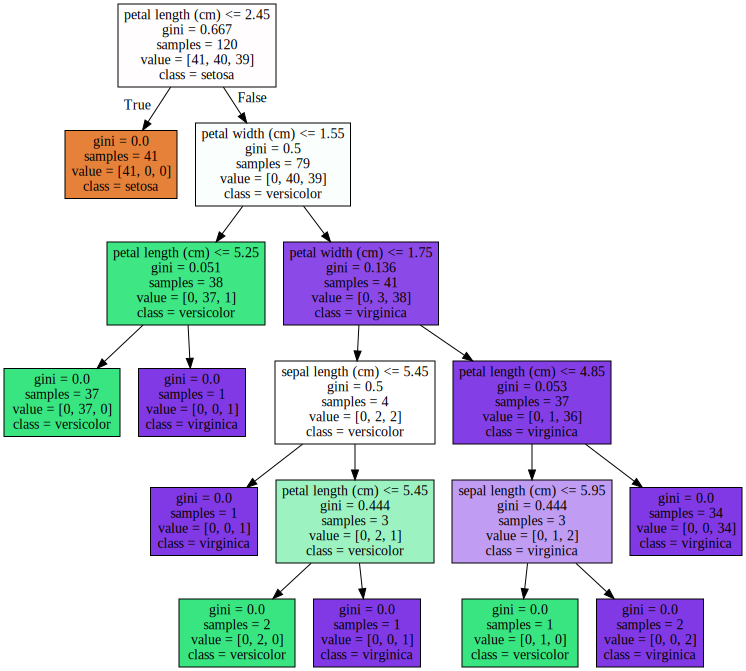

In [18]:
# min_samples_leaf : leaf노드가 되기 위한 최소한의 샘플 수
df_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names, 
                feature_names=iris.feature_names, impurity=True, filled=True)

with open("data/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

---
### 특성 중요도

In [21]:
print(dt_clf.feature_importances_)

[0.02500521 0.         0.55490281 0.42009198]


In [23]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


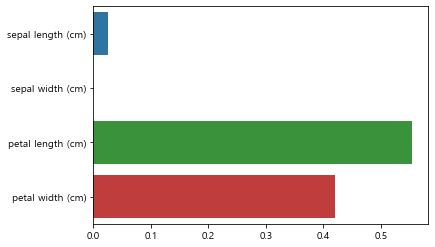

In [24]:
# 그래프
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

#### breast_cancer 데이터셋 활용

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

#stratify : 데이터를 계층으로 나눠 표본(훈련용, 테스트용)을 골고루 뽑아내겠다.

In [31]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [32]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))
# 과적합 확인 

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


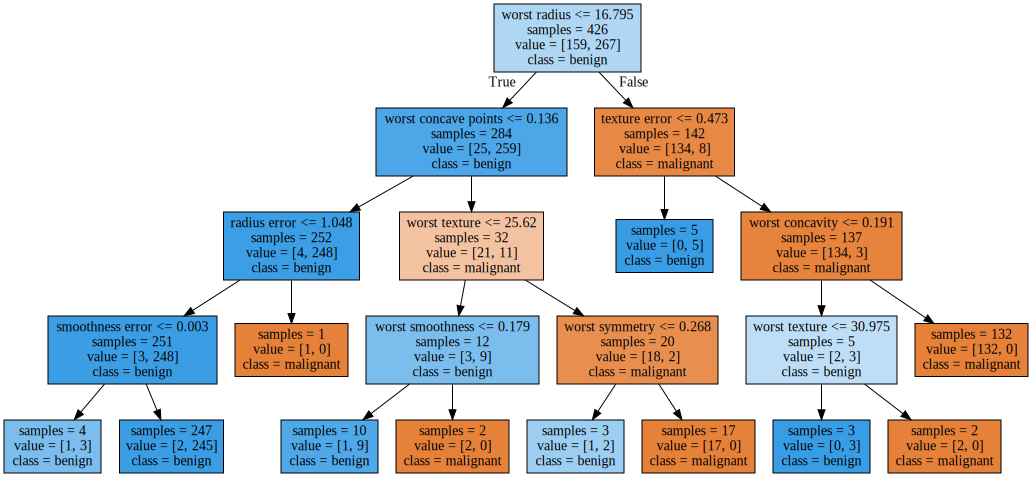

In [33]:
export_graphviz(tree, out_file="data/tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("data/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [39]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


([<matplotlib.axis.YTick at 0x20487d4b550>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

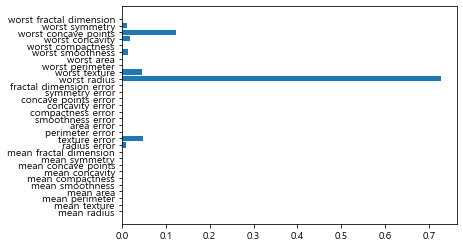

In [42]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), cancer.feature_names)

### 사례1 : iris 데이터 활용

In [28]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["result"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# StandardScaler 객체를 이용하여 최적화(표준화)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

# 표준편차 구하기
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std

In [12]:
# 훈련
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
print("훈련 정확도 : ", model.score(X_train, y_train))
print("테스트 정확도 : ", model.score(X_test, y_test))

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


In [16]:
# 의사 결정 나무 훈련
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3)
model.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
print("훈련 정확도 : ", model.score(X_train_std, y_train))
print("테스트 정확도 : ", model.score(X_test_std, y_test))
# 전혀 영향 없음

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


### 사례2 : 서울 지역 동 분류

서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [18]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [20]:
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[["district", "longitude", "latitude", "label"]]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [21]:
# 테스트 데이터
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [23]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[["dong", "longitude", "latitude", "label"]]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [26]:
# 현재 가지고 있는 데이터에서 레이블의 갯수 확인

print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangseo     5
Gangdong    5
Gangbuk     5
Gangnam     5
Name: label, dtype: int64
Gangseo     5
Gangdong    5
Gangbuk     5
Gangnam     5
Name: label, dtype: int64


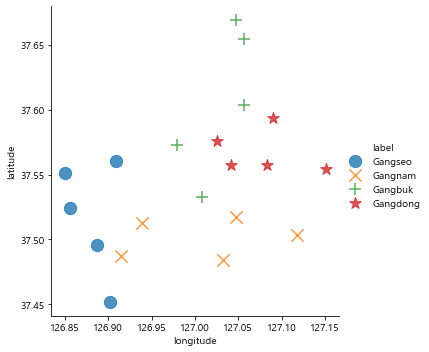

In [43]:
# 데이터 시각화

sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False, markers=["o", "x", "+", "*"], 
           hue="label", scatter_kws={"s":150})

In [46]:
# 구 이름과 동 이름을 삭제
train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

KeyError: "['district'] not found in axis"

In [41]:
train_df
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [45]:
X_train = train_df[["longitude", "latitude"]]
y_train = train_df[["label"]]

X_test = test_df[["longitude", "latitude"]]
y_test = test_df[["label"]]

In [32]:
# Label값을 숫자로 변환
from sklearn import preprocessing

# preprocessing : 문자 -> 숫자, 카테고리로 범주화시켜줌
le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [33]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [34]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

In [35]:
display_decision_surface(clf, X_train, y_encode)

AttributeError: 'numpy.ndarray' object has no attribute 'longitude'

In [52]:
# 가지치기
clf = DecisionTreeClassifier(random_state=35, max_depth=4, min_samples_leaf=2, min_samples_split=2).fit(X_train, y_encode)

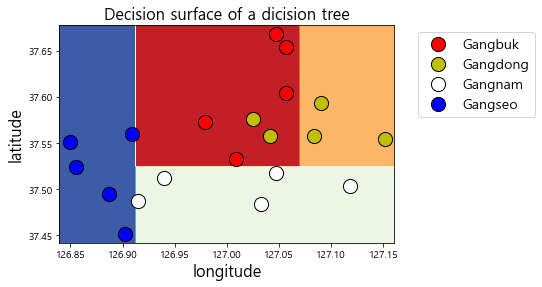

In [53]:
display_decision_surface(clf, X_train, y_encode)

In [31]:
import os
import graphviz
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"], 
                feature_names=["longitude", "latitude"])
    
g = graphviz.Source(graph)
g.render("seoul")
g

NameError: name 'clf' is not defined

In [65]:
# 정확도
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


---
## RandomForest(p.254)

+ 앙상블(Ensemble)
    - vote 방식
        - 소프트 보팅 : 확률 평균
        - 하드 보팅 : 다수결
        
    - 종류
        - Voting
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
            
        - Bagging
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            - 랜덤 포레스트
            
        - Boosting
            - 여러 개의 분류기가 순차적으로 학습을 하되 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting (단점. 시간이 오래걸림)
            - XGBoost(Extra Gradient Boosting), Light GVM, Stacking
            
+ 병렬 수행
    - n_jobs
    
    
+ 주요 파라미터
    - n_estimators
    - max_features
    - max_depth

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [16]:
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, statify=y)

TypeError: Invalid parameters passed: {'statify': array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)}

In [75]:
forest = RandomForestClassifier(random_stste=2, n_estimators=5)
forest.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'random_stste'

NameError: name 'forest' is not defined

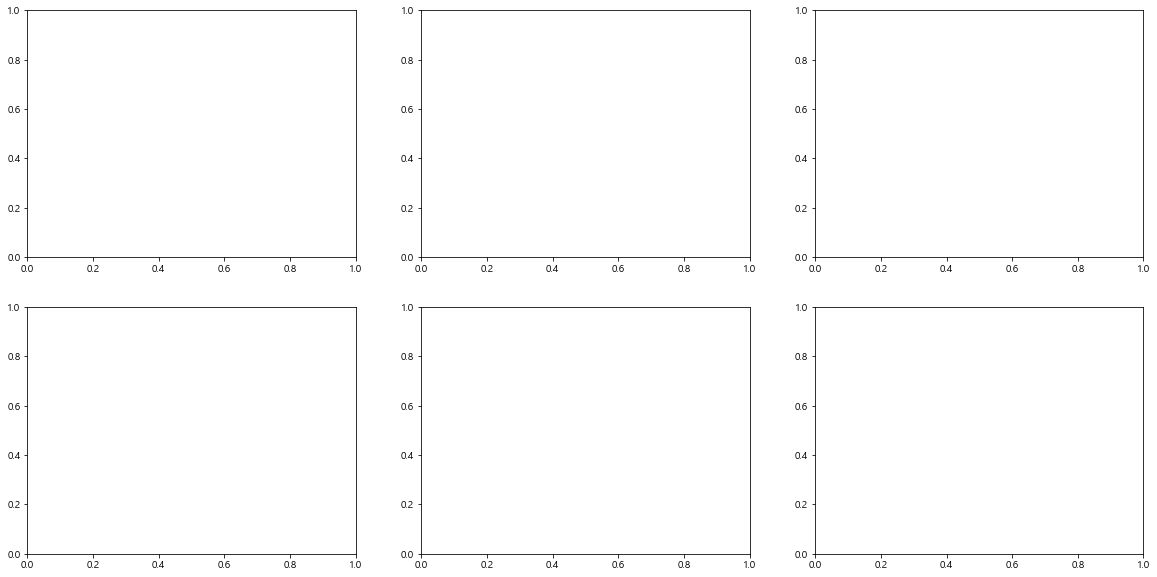

In [78]:
# 그래프
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### DecisionTree vs RandomForest 

#### 1. cancer 데이터 활용

In [48]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [60]:
# DicisionTree
model1 = DecisionTreeClassifier(max_depth=4, random_state=0) #, max_depth=3
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [61]:
print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.9020979020979021


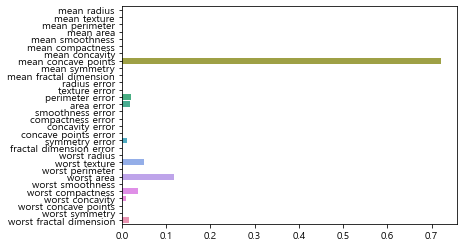

In [62]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [38]:
# Random Forest
model2 = RandomForestClassifier(random_state=0, n_estimators=100)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


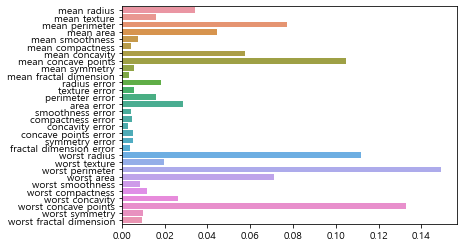

In [45]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

#### 2. 손글씨 이미지 데이터 활용

In [53]:
mnist = datasets.load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [54]:
X, y = mnist.data, mnist.target

In [55]:
# 교차검증을 위한 공용 함수
from sklearn.model_selection import cross_val_score

def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
        
    return cv_scores


In [56]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

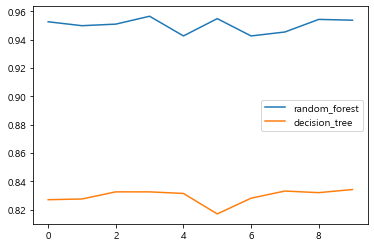

In [59]:
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df.head()
df.plot()

In [64]:
# DecisionTree(노란선)
print(np.mean(dt_cv_scores))

# RandomForest(파란선)
print(np.mean(rf_cv_scores))

0.8294733085040347
0.9504112352576038


---
### 사례1 : 독버섯 데이터 활용

+ https://archive.ics.uci.edu/ml/index.php
+ https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data


+ 파일명을 mushrooms.csv로 변경

In [65]:
import urllib.request as req

savedir = "data/mushrooms.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료


In [2]:
mr = pd.read_csv("data/mushrooms.csv", header=None)
mr.shape
#mr.head()

(8124, 23)

In [3]:
# 결측치 확인
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [4]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# 데이터와 레이블 분리
X = mr.drop(0, axis=1) 
y = mr[0]

In [6]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [7]:
# 데이터를 숫자화
from sklearn.preprocessing import LabelEncoder

# 객체 생성
encoder_X = LabelEncoder()

# 레코드 갯수만큼 반복
for col in X.columns:
    X[col] = encoder_X.fit_transform(X[col])
    
encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

In [8]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
# 훈련
clf = RandomForestClassifier().fit(X_train, y_train)

In [14]:
pred = clf.predict(X_test)

In [15]:
# 정합도 확인
from sklearn.metrics import accuracy_score, classification_report

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ", classification_report(y_test, pred))

정답률 :  1.0
오차율 :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       1.00      1.00      1.00       945

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [18]:
# DesicionTree
# Gridsearch
clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ", classification_report(y_test, pred))

정답률 :  1.0
오차율 :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       1.00      1.00      1.00       945

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [19]:
# KNN

clf = KNeighborsClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ", classification_report(y_test, pred))

정답률 :  0.9980305268340719
오차율 :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       1.00      1.00      1.00       945

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [21]:
# Logistic Regression

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred = clf.predict(X_test)

print("정답률 : ", accuracy_score(y_test, pred))
print("오차율 : ", classification_report(y_test, pred))

정답률 :  0.9512555391432792
오차율 :                precision    recall  f1-score   support

           0       0.95      0.96      0.95      1086
           1       0.95      0.94      0.95       945

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



---
## Gradient Boosting Regression Tree

+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사하강법(Gradient Desent))
+ 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공
+ learing_rate를 사용하여 오차 보정

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [28]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [23]:
?GradientBoostingClassifier

In [29]:
#defaut 
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [25]:
#max_depth 
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9840800919087478
테스트 정확도 :  0.982767109798129


In [26]:
#learning_rate
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9796487772854094
테스트 정확도 :  0.9783357951747907


훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


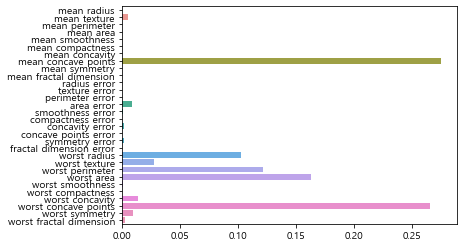

In [30]:
#특성 중요도 
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

---
## Voting Classifier

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [40]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=156, test_size=0.2)

In [41]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [42]:
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [43]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [44]:
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : ", accuracy_score(y_test, pred))

Voting 분류기 정확도 :  0.9473684210526315


In [45]:
# 각각 해봤을때

classifiers = [lr_clf, knn_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print("{0}정확도 : {1:4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression정확도 : 0.964912
KNeighborsClassifier정확도 : 0.938596


In [49]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, pred))

knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9649122807017544
0.9385964912280702


In [48]:
dir(lr_clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

---
## Grid Search

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons

In [54]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [57]:
# 기본값으로 확인
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict(X_test)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.936


In [60]:
from sklearn.model_selection import GridSearchCV

In [64]:
params = {'n_estimators':[100, 200, 300], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9], 
          'min_samples_leaf':[1, 2, 3, 4, 5],
         'min_samples_split':[4, 8, 10, 11, 12, 13, 14]}

clf2 = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(clf2, param_grid=params, cv=2, n_jobs=-1)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [65]:
print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

최적의 하이퍼 파라미터
 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도 :  0.9453333333333334


In [67]:
pred = grid_cv.best_estimator_.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.936


In [68]:
# Grident Boosting

clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf3.predict(X_test)

print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))

훈련 정확도 :  0.988
테스트 정확도 :  0.932


In [74]:
params = {'n_estimators':[100, 200], 'learning_rate':[0.1, 0.01, 0.001, 1], 'max_depth':[3, 4, 5, 6, 7]}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, cv=2, verbose=1)

grid_cv.fit(X_train, y_train)

print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   44.7s finished


최적의 하이퍼 파라미터
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도 :  0.9373333333333334


In [75]:
pred = grid_cv.best_estimator_.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.932
